In [131]:
#zeros(2, 3, 30)

In [132]:
using LinearAlgebra
using Statistics
using Random
using Distributions

In [133]:
# Współczynniki
alpha_11 = 0.85
alpha_12 = 0.1
alpha_21 = 0.5
alpha_22 = 0.5
alpha_23 = 0.0
alpha_31 = 0.12
alpha_32 = 0.12
M_przez_S = 0.3
S_przez_M = 1 / M_przez_S
alpha_13 = (1 - (alpha_11 + alpha_21*alpha_12/(1 - alpha_22)))*S_przez_M
alpha_33 = (1 - (alpha_31 + alpha_32*alpha_21/(1 - alpha_22))*S_przez_M);

In [134]:
# Macierz układu
A = [alpha_11 alpha_12 alpha_13; alpha_21 alpha_22 alpha_23; alpha_31 alpha_32 alpha_33]

3×3 Matrix{Float64}:
 0.85  0.1   0.166667
 0.5   0.5   0.0
 0.12  0.12  0.2

In [135]:
#Warunki początkowe
S = 5.0e6
D = 5.0e6
M = M_przez_S * D
X_0 = [D, S, M]
T = 100
# Sprawdzamy poprawność
#println("Okołopoprawne? ", A*X_0 ≈ X_0)
println("Poprawne? ", A*X_0 == X_0)

Poprawne? true


In [136]:
A

3×3 Matrix{Float64}:
 0.85  0.1   0.166667
 0.5   0.5   0.0
 0.12  0.12  0.2

In [137]:
M

1.5e6

In [138]:
X_0

3-element Vector{Float64}:
 5.0e6
 5.0e6
 1.5e6

In [139]:
A*X_0

3-element Vector{Float64}:
 5.0e6
 5.0e6
 1.5e6

In [140]:
# Tablice zmiennych
Z_D = 5000
X_D_zakł = zeros(Z_D, 3, T)
D_zakł = zeros(Z_D, T);
S_zakł = zeros(Z_D, T)
M_zakł = zeros(Z_D, T)

5000×100 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱            ⋮                   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [141]:
# Rozkład Gumbela dla zakłóceń
#==#
μ = 0.0
λ = 2.5*10^(3)
Gumbel_distr_1 = Gumbel(μ,λ)
D_zakł[:, 2:T] .= rand(Gumbel_distr_1, Z_D, T-1)
S_zakł[:, 2:T] .= rand(Gumbel_distr_1, Z_D, T-1)
M_zakł[:, 2:T] .= rand(Gumbel_distr_1, Z_D, T-1)

5000×99 view(::Matrix{Float64}, :, 2:100) with eltype Float64:
  1974.24     -748.269    1744.94    …    836.502    982.459      56.5377
   580.605     970.688     -93.0114       960.887  -2856.46    -1952.76
  -640.879    1343.37     5882.96        3508.08   -2586.76     -362.937
 11543.0     14578.6      2292.61        3223.29    5846.23    -1335.06
  -737.799    5384.88     -943.701       3121.89   -3899.68    10288.8
  -954.859    -302.511    -759.418   …   1497.25      56.011    5117.28
  4501.9       517.57     2176.61        1411.95   -2609.3       352.592
   706.738     925.837   -1225.62        4292.11    1682.79      720.301
  -348.969    4930.68     -288.698       4964.98    1853.69    -3818.76
  1668.18     -962.833     327.32        1314.44    3772.14     -401.588
     ⋮                               ⋱                         
   671.74      -57.0682    -50.9671       331.841    578.801   -2373.84
  -766.737    1691.33     3257.3        -2458.72   -1021.79     1065.7
  -80

In [142]:
pwd()

"c:\\Users\\elias\\Downloads"

In [143]:
cd("C:\\Users\\karolina\\Documents\\co_z_pulpitu\\SGH_1_ROK\\2_semestr\\zms")

Base.IOError: IOError: cd("C:\\Users\\karolina\\Documents\\co_z_pulpitu\\SGH_1_ROK\\2_semestr\\zms"): no such file or directory (ENOENT)

In [144]:
import Pkg; Pkg.add("JLD2")

   Resolving package versions...
  No Changes to `C:\Users\elias\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\elias\.julia\environments\v1.9\Manifest.toml`


In [145]:
using JLD2
@save "D_zakł.jld2" D_zakł
@save "S_zakł.jld2" S_zakł
@save "N_zakł.jld2" M_zakł

In [146]:
#= INNA MOŻLIWOŚĆ
using HDF5
# Save the matrix as an HDF5 file
h5write("D_zakł_HDF5.h5", "/dataset", D_zakł)
POZWALA NA HIERARCHICZNY ZAPIS DANYCH ITP.
=#

In [147]:
D_zakł_wczytane = load("D_zakł.jld2")
S_zakł_wczytane = load("S_zakł.jld2")
M_zakł_wczytane = load("M_zakł.jld2")

ArgumentError: ArgumentError: No file exists at given path: M_zakł.jld2

In [148]:
typeof(D_zakł_wczytane)

Dict{String, Any}

In [149]:
typeof(D_zakł_wczytane["D_zakł"])

Matrix{Float64} (alias for Array{Float64, 2})

In [150]:
D_zakł = D_zakł_wczytane["D_zakł"]
S_zakł = S_zakł_wczytane["S_zakł"]
M_zakł = M_zakł_wczytane["M_zakł"]

UndefVarError: UndefVarError: `M_zakł_wczytane` not defined

In [151]:
Wektory_D_zakł = zeros(Z_D, 3, T)
Wektory_D_zakł[:, 1, :] .= D_zakł
Wektory_D_zakł[:, 2, :] .= S_zakł
Wektory_D_zakł[:, 3, :] .= M_zakł

5000×100 view(::Array{Float64, 3}, :, 3, :) with eltype Float64:
 0.0   1974.24     -748.269   …    836.502    982.459      56.5377
 0.0    580.605     970.688        960.887  -2856.46    -1952.76
 0.0   -640.879    1343.37        3508.08   -2586.76     -362.937
 0.0  11543.0     14578.6         3223.29    5846.23    -1335.06
 0.0   -737.799    5384.88        3121.89   -3899.68    10288.8
 0.0   -954.859    -302.511   …   1497.25      56.011    5117.28
 0.0   4501.9       517.57        1411.95   -2609.3       352.592
 0.0    706.738     925.837       4292.11    1682.79      720.301
 0.0   -348.969    4930.68        4964.98    1853.69    -3818.76
 0.0   1668.18     -962.833       1314.44    3772.14     -401.588
 ⋮                            ⋱                         
 0.0    671.74      -57.0682       331.841    578.801   -2373.84
 0.0   -766.737    1691.33       -2458.72   -1021.79     1065.7
 0.0   -806.109    5620.43        2541.76    2989.79    -1481.74
 0.0     31.6813  -1280.21   

In [152]:
size(Wektory_D_zakł)

(5000, 3, 100)

In [153]:
#Powtórzenia układu - symulacja
size(X_D_zakł[:, :, 1])
size(X_0)
for i in range(1,Z_D)
X_D_zakł[i, :, 1] .= X_0
end

In [154]:
size(X_D_zakł[:,:,1])

(5000, 3)

In [155]:
X_D_zakł[:, :, 1]

5000×3 Matrix{Float64}:
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 ⋮             
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6

In [156]:
#transpose(X_0)

In [157]:
X_D_zakł[:, :, 1] .= transpose(X_0)

5000×3 view(::Array{Float64, 3}, :, :, 1) with eltype Float64:
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 ⋮             
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6

In [158]:
#X_D_zakł[1,:,1]

In [159]:
#Powtórzenia układu - symulacja
size(X_D_zakł[:, :, 1])
size(X_0)
X_D_zakł[:, :, 1] .= transpose(X_0);
for z in 1:Z_D
    for t in 2:T
 
        X_D_zakł[z, :, t] = A * X_D_zakł[z, :, t-1] + 1000*Wektory_D_zakł[z, :, t]

    end
end

In [160]:
# Confidence intervals and statistics
CI_D_5p_min_D_zakł = zeros(T)
CI_D_5p_max_D_zakł = zeros(T)
CI_S_5p_min_D_zakł = zeros(T)
CI_S_5p_max_D_zakł = zeros(T)
CI_M_5p_min_D_zakł = zeros(T)
CI_M_5p_max_D_zakł = zeros(T)
UPORZADKOWANE_D = zeros(Z_D, T)
UPORZADKOWANE_S = zeros(Z_D, T)
UPORZADKOWANE_M = zeros(Z_D, T)
for t in 1:T
UPORZADKOWANE_D[:, t] = sort(X_D_zakł[:, 1, t])
CI_D_5p_min_D_zakł[t] = UPORZADKOWANE_D[250, t]
CI_D_5p_max_D_zakł[t] = UPORZADKOWANE_D[4750, t]
UPORZADKOWANE_S[:, t] = sort(X_D_zakł[:, 2, t])
CI_S_5p_min_D_zakł[t] = UPORZADKOWANE_S[250, t]
CI_S_5p_max_D_zakł[t] = UPORZADKOWANE_S[4750, t]
UPORZADKOWANE_M[:, t] = sort(X_D_zakł[:, 3, t])
CI_M_5p_min_D_zakł[t] = UPORZADKOWANE_M[250, t]
CI_M_5p_max_D_zakł[t] = UPORZADKOWANE_M[4750, t]
end
CI_D_średnia_D_zakł = zeros(T)
CI_S_średnia_D_zakł = zeros(T)
CI_M_średnia_D_zakł = zeros(T)
CI_D_mediana_D_zakł = zeros(T)
CI_S_mediana_D_zakł = zeros(T)
CI_M_mediana_D_zakł = zeros(T)
CI_D_średnia_D_zakł[:] = mean(X_D_zakł[:, 1, :], dims=1)
CI_S_średnia_D_zakł[:] = mean(X_D_zakł[:, 2, :], dims=1)
CI_M_średnia_D_zakł[:] = mean(X_D_zakł[:, 3, :], dims=1)
CI_D_mediana_D_zakł[:] = median(X_D_zakł[:, 1, :], dims=1)
CI_S_mediana_D_zakł[:] = median(X_D_zakł[:, 2, :], dims=1)
CI_M_mediana_D_zakł[:] = median(X_D_zakł[:, 3, :], dims=1)

1×100 Matrix{Float64}:
 1.5e6  2.49325e6  3.1416e6  3.64282e6  …  4.92724e7  4.97388e7  5.01858e7

In [161]:
#typeof(CI_M_mediana_D_zakł)

In [162]:
using Plots

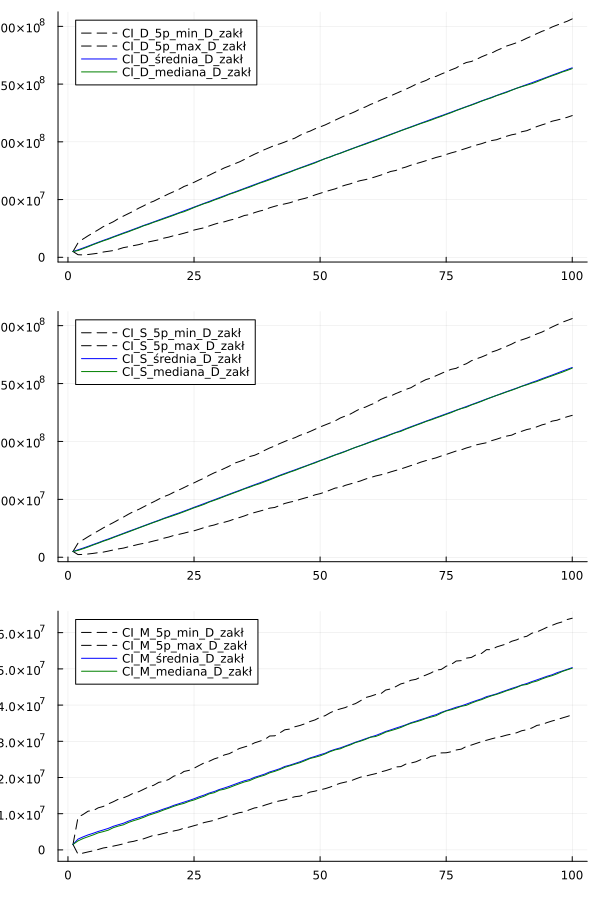

"c:\\Users\\elias\\Downloads\\plot2.svg"

In [163]:
# Rysowanie - rysunek z trzema (pod)wykresami
p = plot(layout = (3, 1), size = (600, 900)) # Trzy (pod)wykresy pionowo
T=100
# Subplot 1
plot!(p[1], 1:T, CI_D_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_min_D_zakł")
plot!(p[1], 1:T, CI_D_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_max_D_zakł")
plot!(p[1], 1:T, CI_D_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_D_średnia_D_zakł")
plot!(p[1], 1:T, CI_D_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_D_mediana_D_zakł")
# Subplot 2
plot!(p[2], 1:T, CI_S_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_min_D_zakł")
plot!(p[2], 1:T, CI_S_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_max_D_zakł")
plot!(p[2], 1:T, CI_S_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_S_średnia_D_zakł")
plot!(p[2], 1:T, CI_S_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_S_mediana_D_zakł")
# Subplot 3
plot!(p[3], 1:T, CI_M_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_min_D_zakł")
plot!(p[3], 1:T, CI_M_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_max_D_zakł")
plot!(p[3], 1:T, CI_M_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_M_średnia_D_zakł")
plot!(p[3], 1:T, CI_M_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_M_mediana_D_zakł")
# Display the plot
display(p)
#
savefig(p, "plot2.svg")
#UWAGA, BRZYDKO WYCHODZI - TRZEBA BĘDZIE DOSTOSOWAĆ WYKRES!


In [164]:
CI_M_mediana_D_zakł

100-element Vector{Float64}:
 1.5e6
 2.49325004930998e6
 3.141597363327739e6
 3.6428239486594675e6
 4.139144340433373e6
 4.700721462163689e6
 5.049172812714452e6
 5.448895919558357e6
 6.136513806094366e6
 6.582074204658227e6
 ⋮
 4.626946877508472e7
 4.664106171501416e7
 4.7213470074950665e7
 4.7718668398148075e7
 4.8122628611579396e7
 4.864175241378561e7
 4.927239290232421e7
 4.9738835160673566e7
 5.018578699826493e7

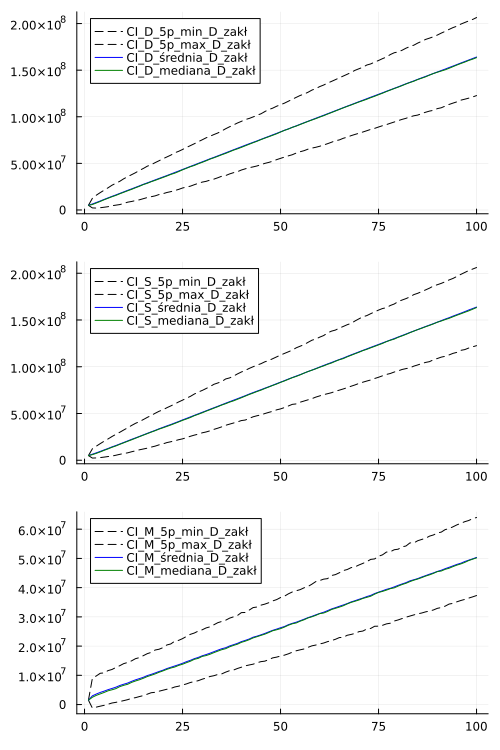

In [165]:
# Rysowanie - rysunek z trzema (pod)wykresami
p = plot(layout = (3, 1), size = (500, 750),left_margin = 6Plots.mm) # POSZERZAMY L
T=100
# Subplot 1
plot!(p[1], 1:T, CI_D_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_min_D_zakł")
plot!(p[1], 1:T, CI_D_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_max_D_zakł")
plot!(p[1], 1:T, CI_D_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_D_średnia_D_zakł")
plot!(p[1], 1:T, CI_D_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_D_mediana_D_zakł")
# Subplot 2
plot!(p[2], 1:T, CI_S_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_min_D_zakł")
plot!(p[2], 1:T, CI_S_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_max_D_zakł")
plot!(p[2], 1:T, CI_S_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_S_średnia_D_zakł")
plot!(p[2], 1:T, CI_S_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_S_mediana_D_zakł")
# Subplot 3
plot!(p[3], 1:T, CI_M_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_min_D_zakł")
plot!(p[3], 1:T, CI_M_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_max_D_zakł")
plot!(p[3], 1:T, CI_M_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_M_średnia_D_zakł")
plot!(p[3], 1:T, CI_M_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_M_mediana_D_zakł")
# Display the plot
display(p)
#
#savefig(p, "plot_rzd2.svg")

In [166]:
#Powtórzenia układu - symulacja
size(X_D_zakł[:, :, 1])
size(X_0)
X_D_zakł[:, :, 1] .= transpose(X_0);
for z in 1:Z_D
    for t in 2:T
        if t==2
            X_D_zakł[z, :, t] = A * X_D_zakł[z, :, t-1] + 1000*Wektory_D_zakł[z, :, t]
        else
            X_D_zakł[z, :, t] = A * X_D_zakł[z, :, t-1] 
        end

    end
end

In [167]:
# Confidence intervals and statistics
CI_D_5p_min_D_zakł = zeros(T)
CI_D_5p_max_D_zakł = zeros(T)
CI_S_5p_min_D_zakł = zeros(T)
CI_S_5p_max_D_zakł = zeros(T)
CI_M_5p_min_D_zakł = zeros(T)
CI_M_5p_max_D_zakł = zeros(T)
UPORZADKOWANE_D = zeros(Z_D, T)
UPORZADKOWANE_S = zeros(Z_D, T)
UPORZADKOWANE_M = zeros(Z_D, T)
for t in 1:T
UPORZADKOWANE_D[:, t] = sort(X_D_zakł[:, 1, t])
CI_D_5p_min_D_zakł[t] = UPORZADKOWANE_D[250, t]
CI_D_5p_max_D_zakł[t] = UPORZADKOWANE_D[4750, t]
UPORZADKOWANE_S[:, t] = sort(X_D_zakł[:, 2, t])
CI_S_5p_min_D_zakł[t] = UPORZADKOWANE_S[250, t]
CI_S_5p_max_D_zakł[t] = UPORZADKOWANE_S[4750, t]
UPORZADKOWANE_M[:, t] = sort(X_D_zakł[:, 3, t])
CI_M_5p_min_D_zakł[t] = UPORZADKOWANE_M[250, t]
CI_M_5p_max_D_zakł[t] = UPORZADKOWANE_M[4750, t]
end
CI_D_średnia_D_zakł = zeros(T)
CI_S_średnia_D_zakł = zeros(T)
CI_M_średnia_D_zakł = zeros(T)
CI_D_mediana_D_zakł = zeros(T)
CI_S_mediana_D_zakł = zeros(T)
CI_M_mediana_D_zakł = zeros(T)
CI_D_średnia_D_zakł[:] = mean(X_D_zakł[:, 1, :], dims=1)
CI_S_średnia_D_zakł[:] = mean(X_D_zakł[:, 2, :], dims=1)
CI_M_średnia_D_zakł[:] = mean(X_D_zakł[:, 3, :], dims=1)
CI_D_mediana_D_zakł[:] = median(X_D_zakł[:, 1, :], dims=1)
CI_S_mediana_D_zakł[:] = median(X_D_zakł[:, 2, :], dims=1)
CI_M_mediana_D_zakł[:] = median(X_D_zakł[:, 3, :], dims=1)

1×100 Matrix{Float64}:
 1.5e6  2.49325e6  2.07813e6  1.91884e6  …  1.87556e6  1.87556e6  1.87556e6

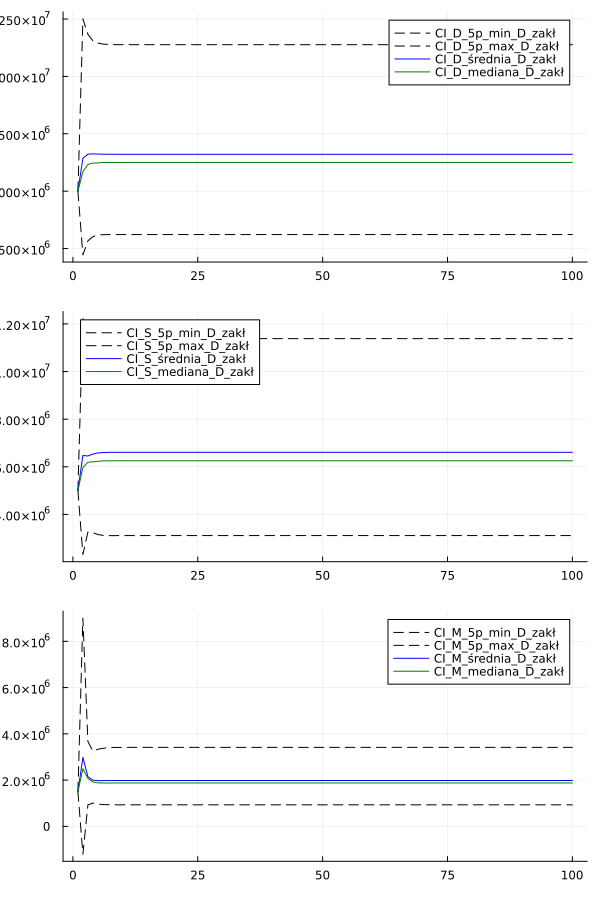

"c:\\Users\\elias\\Downloads\\plot2.svg"

In [168]:
# Rysowanie - rysunek z trzema (pod)wykresami
p = plot(layout = (3, 1), size = (600, 900)) # Trzy (pod)wykresy pionowo
T=100
# Subplot 1
plot!(p[1], 1:T, CI_D_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_min_D_zakł")
plot!(p[1], 1:T, CI_D_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_max_D_zakł")
plot!(p[1], 1:T, CI_D_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_D_średnia_D_zakł")
plot!(p[1], 1:T, CI_D_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_D_mediana_D_zakł")
# Subplot 2
plot!(p[2], 1:T, CI_S_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_min_D_zakł")
plot!(p[2], 1:T, CI_S_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_max_D_zakł")
plot!(p[2], 1:T, CI_S_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_S_średnia_D_zakł")
plot!(p[2], 1:T, CI_S_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_S_mediana_D_zakł")
# Subplot 3
plot!(p[3], 1:T, CI_M_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_min_D_zakł")
plot!(p[3], 1:T, CI_M_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_max_D_zakł")
plot!(p[3], 1:T, CI_M_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_M_średnia_D_zakł")
plot!(p[3], 1:T, CI_M_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_M_mediana_D_zakł")
# Display the plot
display(p)
#
savefig(p, "plot2.svg")
#UWAGA, BRZYDKO WYCHODZI - TRZEBA BĘDZIE DOSTOSOWAĆ WYKRES!